<a href="https://colab.research.google.com/github/zoyazahid/Fetal-Health-/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/fetal_health.csv')
print(data.head())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())
data.fillna(data.median(), inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target variable

# Display the distribution of classes in the target variable
print("Class distribution in fetal_health:")
print(y.value_counts())

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0            

In [4]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 92.72%
Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.98      0.96       332
     Suspect       0.85      0.68      0.75        59
Pathological       0.86      0.86      0.86        35

    accuracy                           0.93       426
   macro avg       0.88      0.84      0.86       426
weighted avg       0.92      0.93      0.92       426



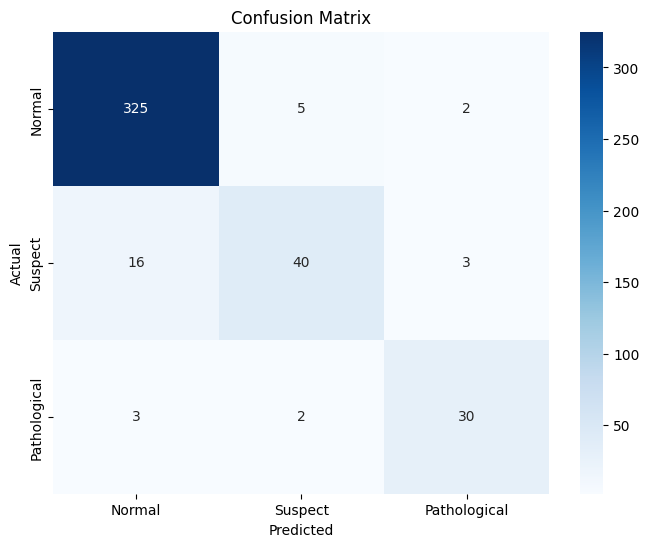

Feature Importances:
                                              Feature  Importance
8                mean_value_of_short_term_variability    0.128883
7                     abnormal_short_term_variability    0.125857
9   percentage_of_time_with_abnormal_long_term_var...    0.114790
17                                     histogram_mean    0.076400
16                                     histogram_mode    0.067092
6                            prolongued_decelerations    0.058761
18                                   histogram_median    0.058208
1                                       accelerations    0.051878
10                mean_value_of_long_term_variability    0.041557
19                                 histogram_variance    0.040449
3                                uterine_contractions    0.040117
0                                      baseline value    0.038127
11                                    histogram_width    0.036485
12                                      histogram_min  

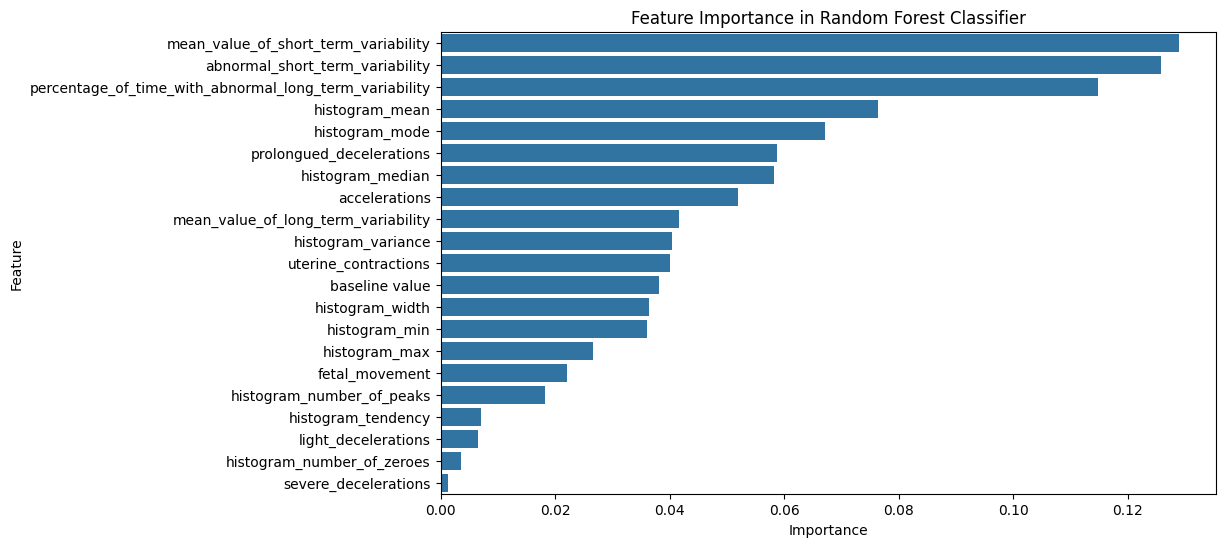

In [5]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Suspect', 'Pathological']))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': data.columns[:-1],
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importances)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest Classifier')
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned * 100:.2f}%")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Model Accuracy: 92.96%


Gradient Boosting Algorithm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0            

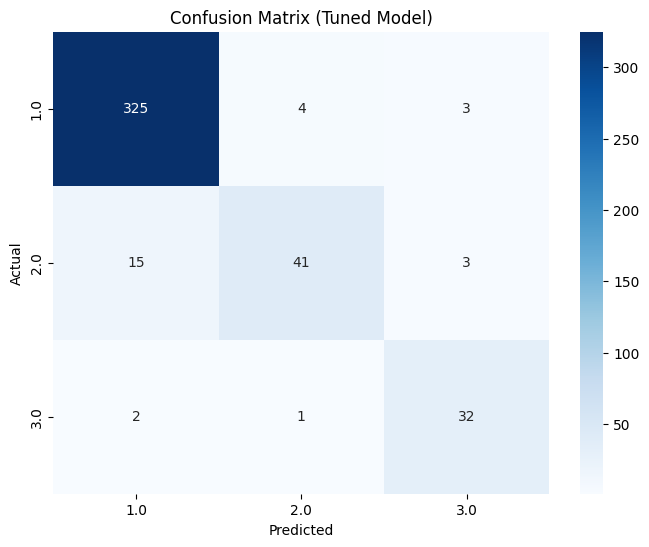

Feature Importances:
                                              Feature  Importance
7                     abnormal_short_term_variability    0.241228
17                                     histogram_mean    0.177426
8                mean_value_of_short_term_variability    0.151067
9   percentage_of_time_with_abnormal_long_term_var...    0.134162
1                                       accelerations    0.057860
0                                      baseline value    0.044240
6                            prolongued_decelerations    0.039523
3                                uterine_contractions    0.034894
13                                      histogram_max    0.026034
16                                     histogram_mode    0.017582
14                          histogram_number_of_peaks    0.015675
10                mean_value_of_long_term_variability    0.014782
12                                      histogram_min    0.013067
11                                    histogram_width  

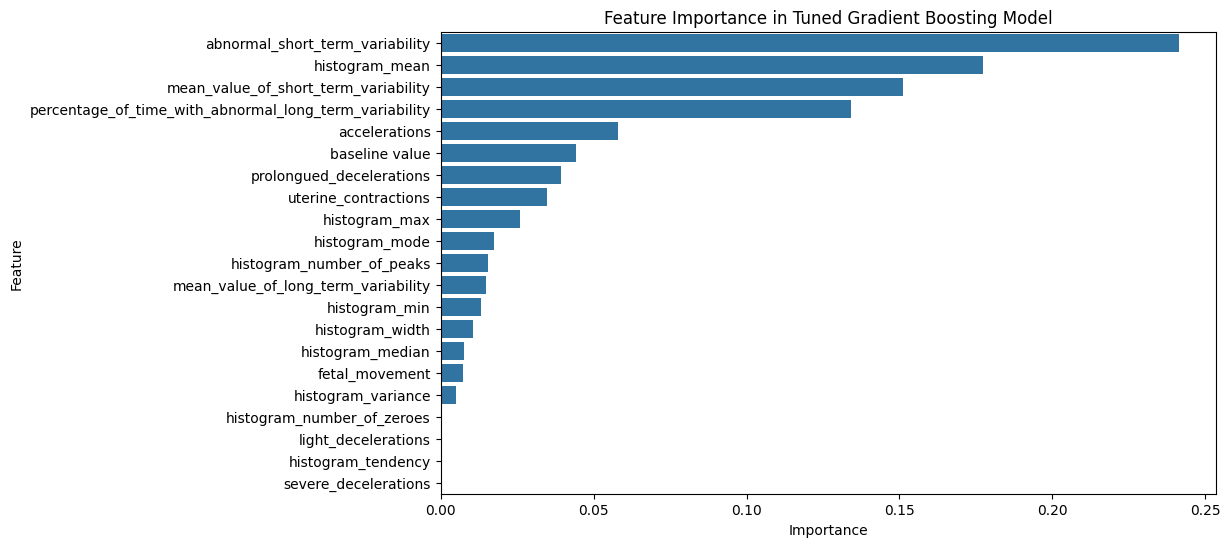

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/fetal_health.csv')  # Replace with your dataset's file path

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handle missing values (if any) using median imputation
data.fillna(data.median(), inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target variable

# Encode the target variable to be zero-indexed
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the distribution of classes in the target variable
print("Class distribution in fetal_health:")
print(np.unique(y_encoded, return_counts=True))

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples at leaf node
}

# Initialize GridSearchCV with Gradient Boosting Classifier
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Gradient Boosting model with the best hyperparameters
best_gb_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_gb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
target_names = label_encoder.classes_  # Original class labels

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Suspect', 'Pathological']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

# Feature importance analysis
feature_importances = best_gb_model.feature_importances_

# Convert to DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance in Tuned Gradient Boosting Model')
plt.show()



Naive Bayes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0            

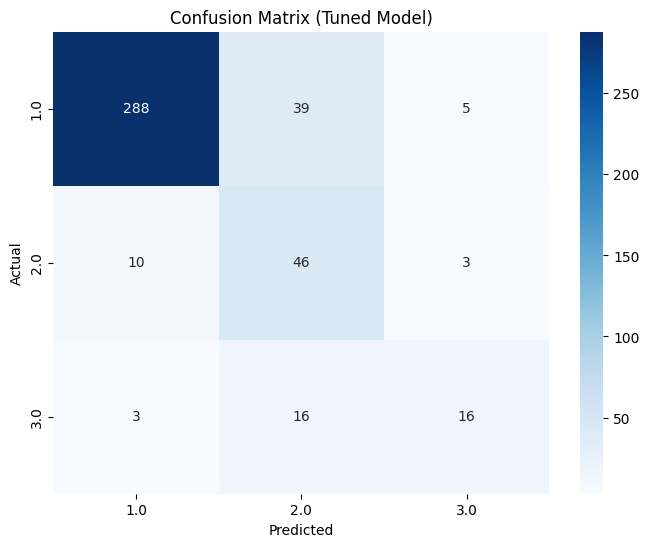

Best var_smoothing parameter: 1.0


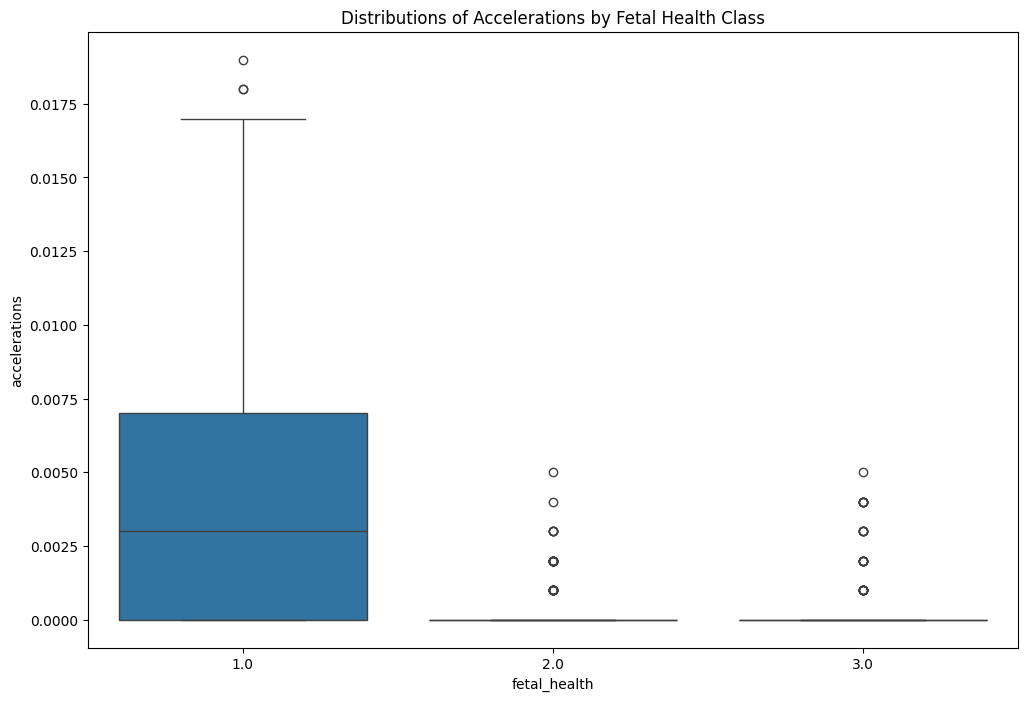

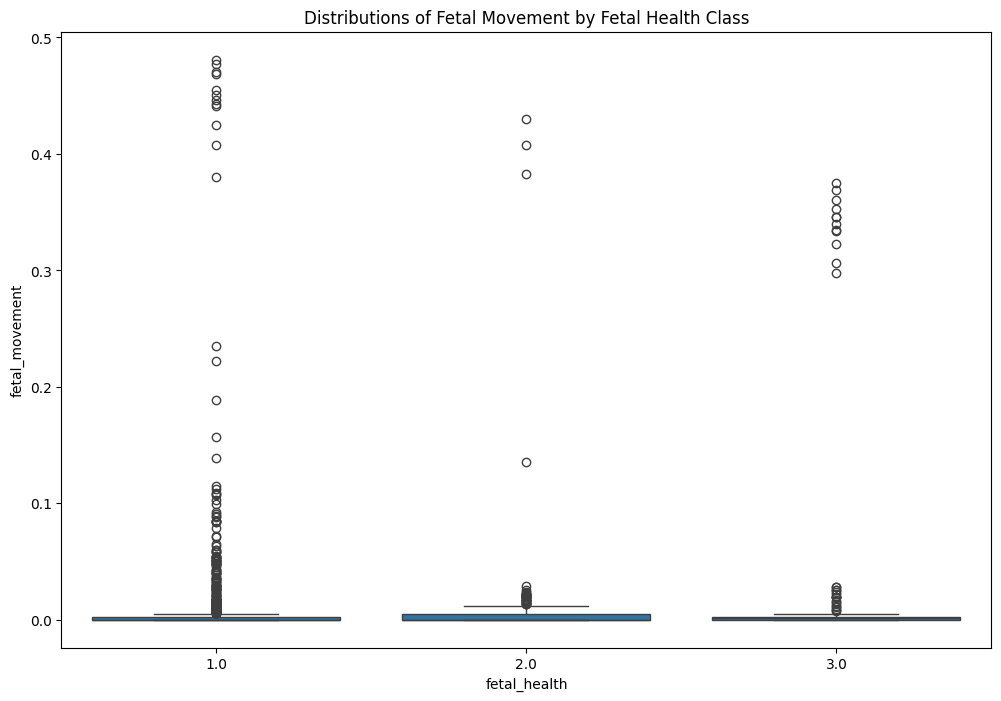

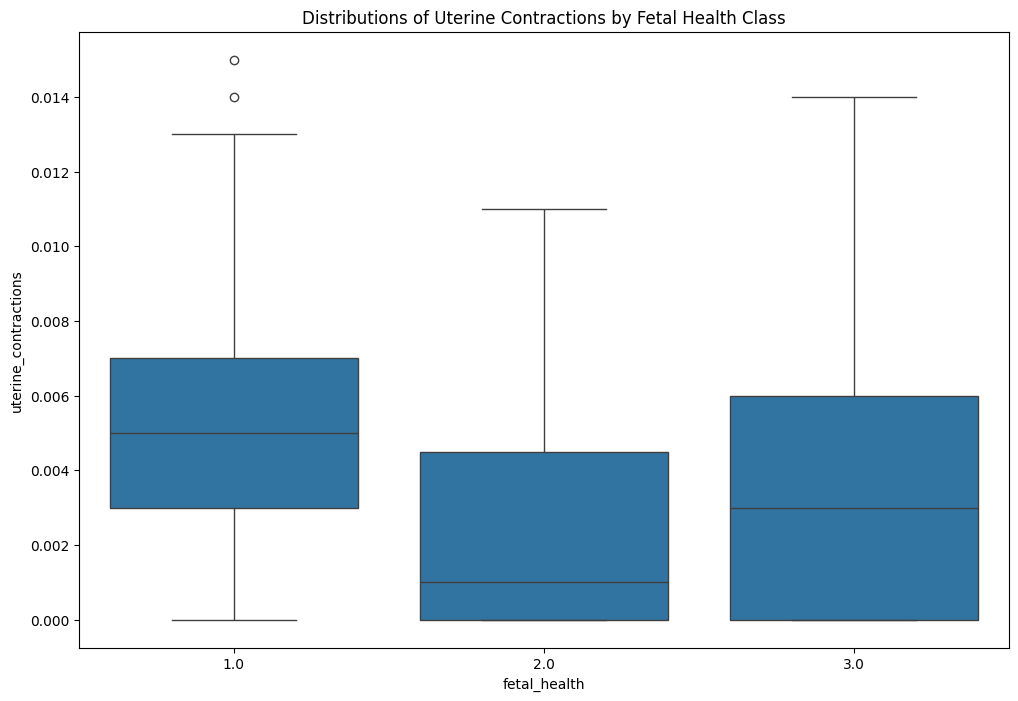

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/fetal_health.csv')  # Replace with your dataset's file path

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handle missing values (if any) using median imputation
data.fillna(data.median(), inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target variable

# Encode the target variable to be zero-indexed (0, 1, 2 for Normal, Suspect, Pathological)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the distribution of classes in the target variable
print("Class distribution in fetal_health:")
print(np.unique(y_encoded, return_counts=True))

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Hyperparameter tuning for Gaussian Naive Bayes
param_grid = {'var_smoothing': np.logspace(-9, 0, 100)}  # Testing a range of var_smoothing values

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1  # Display progress
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Gaussian Naive Bayes classifier with the best parameters
best_nb_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_best = best_nb_model.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best * 100:.2f}%")

# Classification report for the tuned model
target_names = label_encoder.inverse_transform(np.unique(y_encoded))  # Get the original class labels

print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_best, target_names=['Normal', 'Suspect', 'Pathological']))

# Confusion Matrix for the tuned model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

# Display the variance smoothing value used
print(f"Best var_smoothing parameter: {best_nb_model.var_smoothing}")

# Visualize feature distributions by class (optional)
features_df = pd.DataFrame(X, columns=data.columns[:-1])

plt.figure(figsize=(12, 8))
sns.boxplot(x=y, y=features_df['accelerations'])
plt.title('Distributions of Accelerations by Fetal Health Class')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x=y, y=features_df['fetal_movement'])
plt.title('Distributions of Fetal Movement by Fetal Health Class')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x=y, y=features_df['uterine_contractions'])
plt.title('Distributions of Uterine Contractions by Fetal Health Class')
plt.show()


Support Vector Machine

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0            

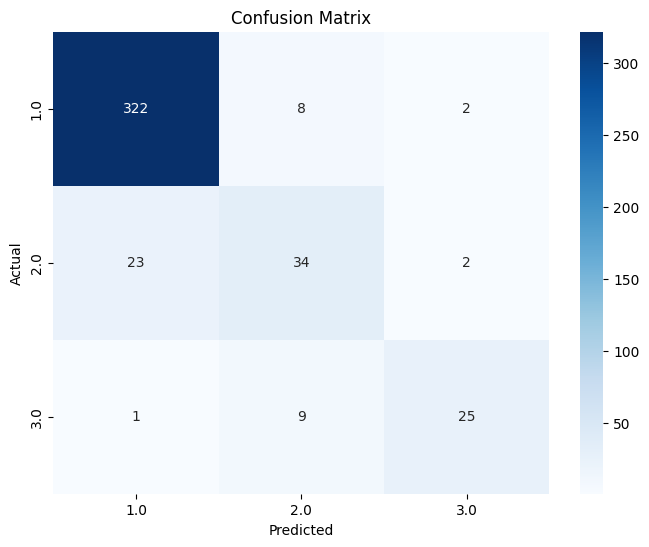

Support Vectors (selected by the SVM):
[[ 0.68060404 -0.8223883  -0.20320955 ...  0.54688431 -0.64920807
  -0.52452553]
 [ 2.51014573 -0.8223883  -0.20320955 ...  1.86056442 -0.58017309
   1.11298001]
 [ 1.9002985  -0.8223883  -0.20320955 ...  1.51485913 -0.58017309
   1.11298001]
 ...
 [-0.2341668  -0.8223883   6.71996937 ... -0.49023157  1.31828887
  -0.52452553]
 [-0.53909042 -0.8223883  -0.20320955 ... -0.90507792 -0.61469058
   1.11298001]
 [-0.53909042 -0.8223883   6.95574327 ... -2.49532227  4.45938047
  -2.16203107]]


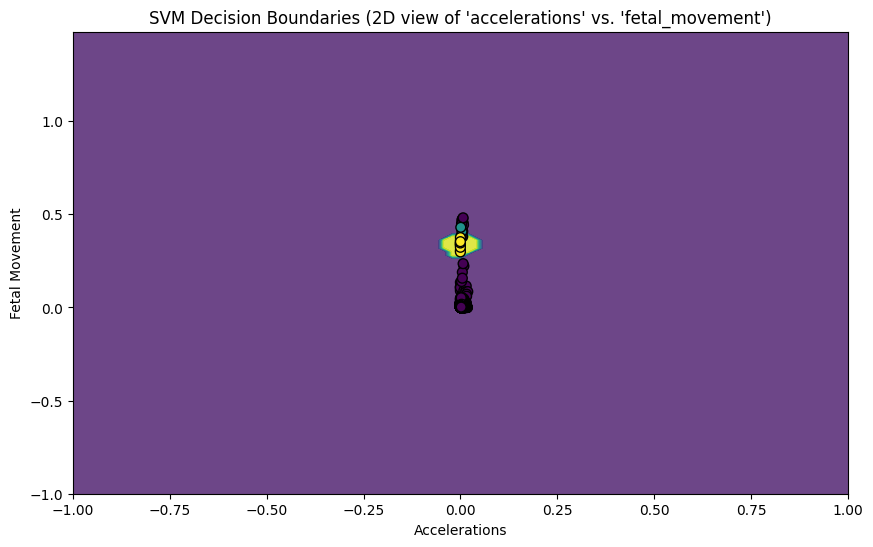

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/fetal_health.csv')  # Replace with your dataset's file path

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handle missing values (if any) using median imputation
data.fillna(data.median(), inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target variable

# Encode the target variable to be zero-indexed (0, 1, 2 for Normal, Suspect, Pathological)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the distribution of classes in the target variable
print("Class distribution in fetal_health:")
print(np.unique(y_encoded, return_counts=True))

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize the Support Vector Machine (SVM) Classifier with a non-linear kernel (RBF)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
target_names = label_encoder.inverse_transform(np.unique(y_encoded))  # Get the original class labels

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Suspect', 'Pathological']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance analysis (SVM does not have built-in feature importance)
# But we can visualize the support vectors or the decision boundaries in 2D or 3D (for small datasets)
print("Support Vectors (selected by the SVM):")
print(svm_model.support_vectors_)

# Visualize decision boundaries (for smaller datasets, ideally 2D features for easy visualization)
# If you want to visualize decision boundaries, select only two features for simplicity (e.g., 'accelerations' and 'fetal_movement')
plt.figure(figsize=(10, 6))

# Sample two features for 2D visualization: "accelerations" and "fetal_movement"
X_2d = X[['accelerations', 'fetal_movement']].values
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

svm_model_2d = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model_2d.fit(X_train_2d, y_train_2d)

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_encoded, edgecolors='k', marker='o', s=50)
plt.title("SVM Decision Boundaries (2D view of 'accelerations' vs. 'fetal_movement')")
plt.xlabel('Accelerations')
plt.ylabel('Fetal Movement')
plt.show()

Decision Tree

Mounted at /content/drive
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0       

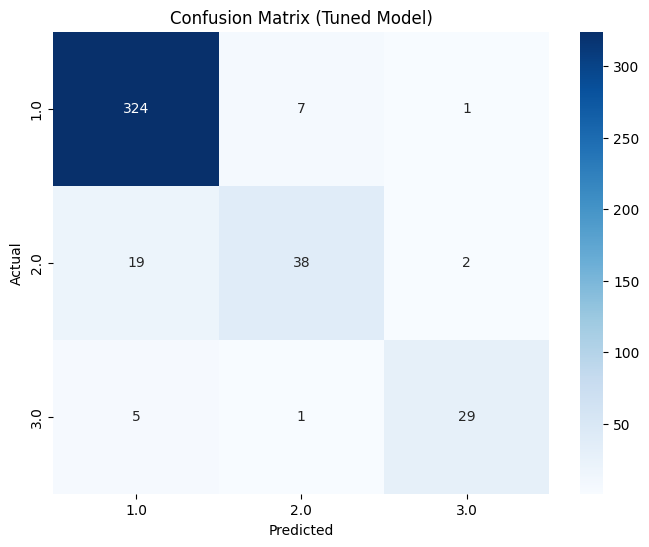

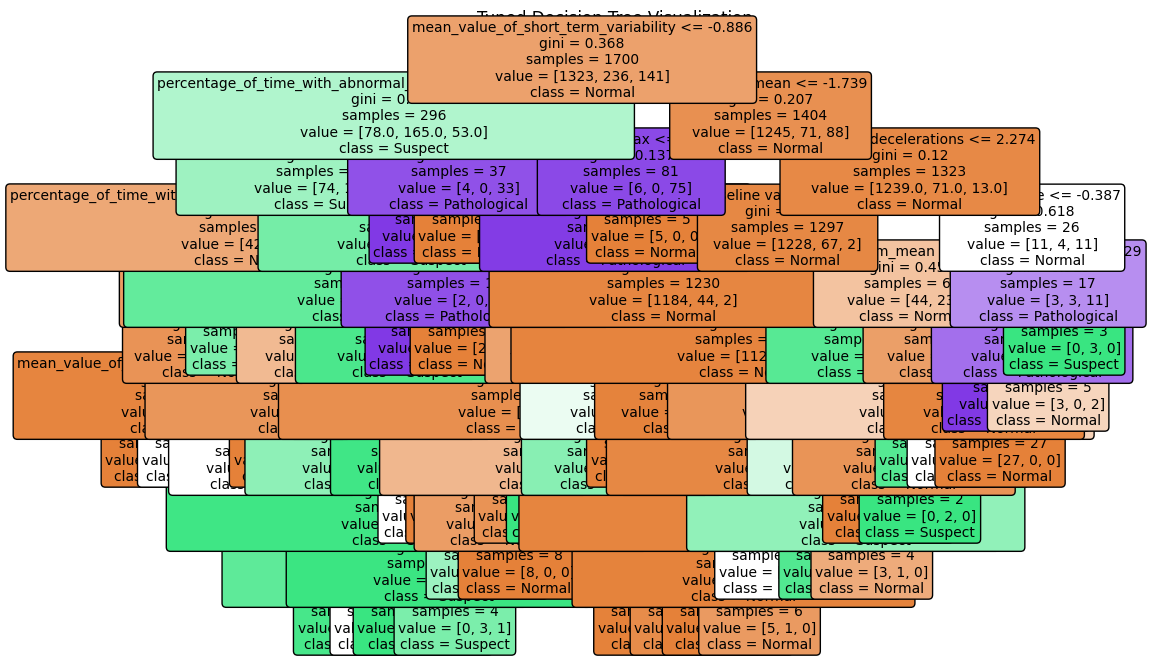

Feature Importances (Tuned Model):
                                              Feature  Importance
8                mean_value_of_short_term_variability    0.315572
17                                     histogram_mean    0.241452
9   percentage_of_time_with_abnormal_long_term_var...    0.117283
7                     abnormal_short_term_variability    0.098805
0                                      baseline value    0.053461
3                                uterine_contractions    0.048469
13                                      histogram_max    0.023351
6                            prolongued_decelerations    0.021474
14                          histogram_number_of_peaks    0.015057
10                mean_value_of_long_term_variability    0.013190
11                                    histogram_width    0.013189
16                                     histogram_mode    0.011604
1                                       accelerations    0.009484
12                                      h

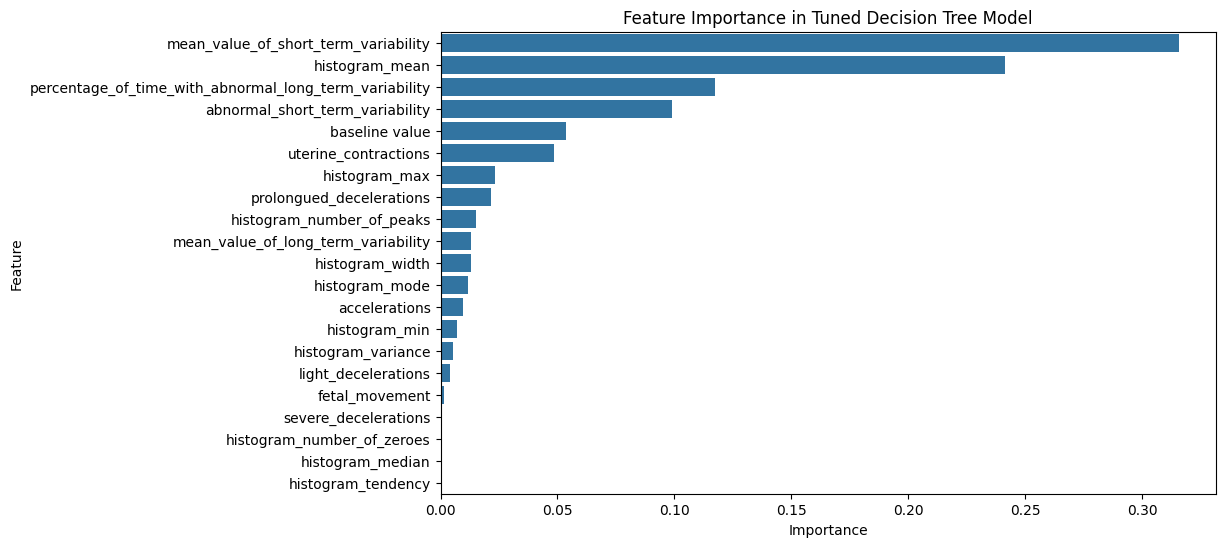

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/fetal_health.csv')  # Replace with your dataset's file path

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handle missing values (if any) using median imputation
data.fillna(data.median(), inplace=True)

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target variable

# Encode the target variable to be zero-indexed (0, 1, 2 for Normal, Suspect, Pathological)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the distribution of classes in the target variable
print("Class distribution in fetal_health:")
print(np.unique(y_encoded, return_counts=True))

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criteria
    'max_depth': [None, 5, 10, 15, 20],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5]  # Minimum samples required to be at a leaf node
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1  # Display progress
)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Decision Tree model using the best hyperparameters
best_dt_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_best = best_dt_model.predict(X_test)

# Calculate accuracy for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_tuned * 100:.2f}%")

# Classification report for the tuned model
target_names = label_encoder.inverse_transform(np.unique(y_encoded))  # Get the original class labels

print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_best, target_names=['Normal', 'Suspect', 'Pathological']))

# Confusion Matrix for the tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

# Visualize the tuned decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=['Normal', 'Suspect', 'Pathological'], rounded=True, fontsize=10)
plt.title("Tuned Decision Tree Visualization")
plt.show()

# Feature importance analysis for the tuned model
feature_importances_tuned = best_dt_model.feature_importances_

# Convert to DataFrame for better visualization
feature_importances_df_tuned = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_tuned
}).sort_values(by='Importance', ascending=False)

# Display feature importances for the tuned model
print("Feature Importances (Tuned Model):")
print(feature_importances_df_tuned)

# Plot the feature importances for the tuned model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_tuned)
plt.title('Feature Importance in Tuned Decision Tree Model')
plt.show()


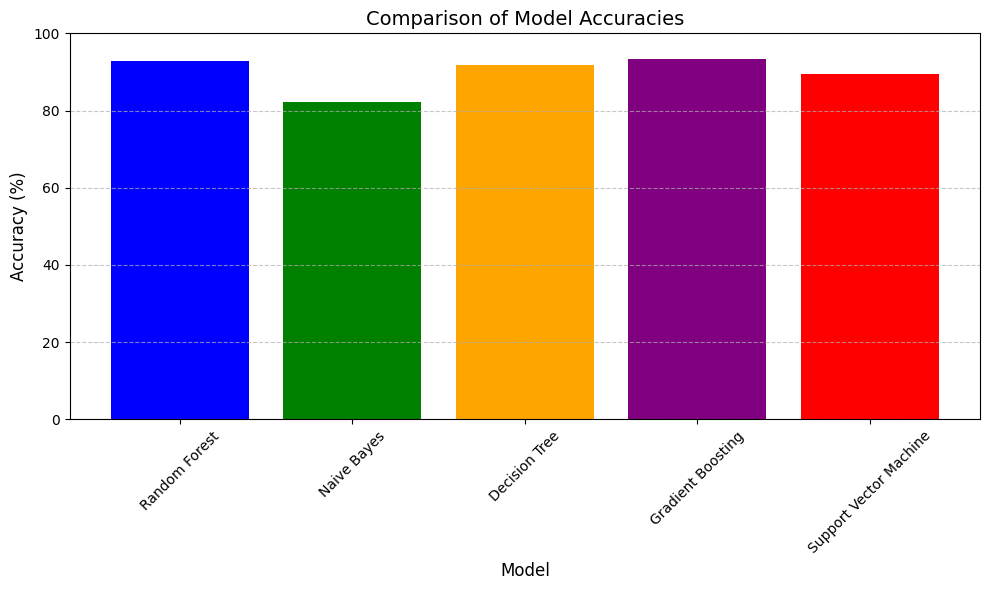

In [ ]:
import matplotlib.pyplot as plt

# Hypothetical accuracies for the models
models = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Gradient Boosting', 'Support Vector Machine']
accuracies = [92.96, 82.16, 91.78, 93.43, 89.44]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.ylim(0, 100)  # Set y-axis range from 0% to 100%
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()
